In [3]:
%%capture capt
!pip install tensorflow

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

2023-11-25 22:48:01.864300: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-25 22:48:01.868679: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-25 22:48:01.919098: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-25 22:48:01.919157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-25 22:48:01.920528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Version:  2.15.0
Eager mode:  True
GPU is NOT AVAILABLE


## Load trained model

In [2]:
model = tf.keras.models.load_model('model.h5')

In [3]:
embedding = model.layers[0].get_weights()[0]
print(f"Embedding shape: {embedding.shape}")

Embedding shape: (5000, 256)


## Scikit-learn t-SNE

In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE(n_components=2, n_jobs=-1)
embedded_data = tsne.fit_transform(embedding)

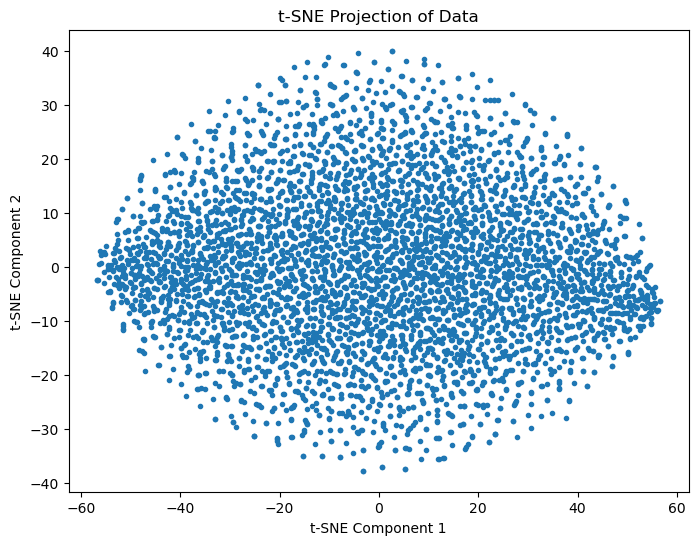

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(embedded_data[:, 0], embedded_data[:, 1], marker='.')
plt.title('t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

## Custom t-SNE

In [7]:
from TSNE import TSNE

In [8]:
t = TSNE(n_components=2, perplexity=30)

In [9]:
low_dim_embedding = t.fit_transform(embedding[:100], verbose=True)

Computing binary search for conditional probabilities...


100%|██████████| 100/100 [00:03<00:00, 31.38it/s]


Starting gradient descent loop...


100%|██████████| 1000/1000 [00:02<00:00, 495.87it/s]


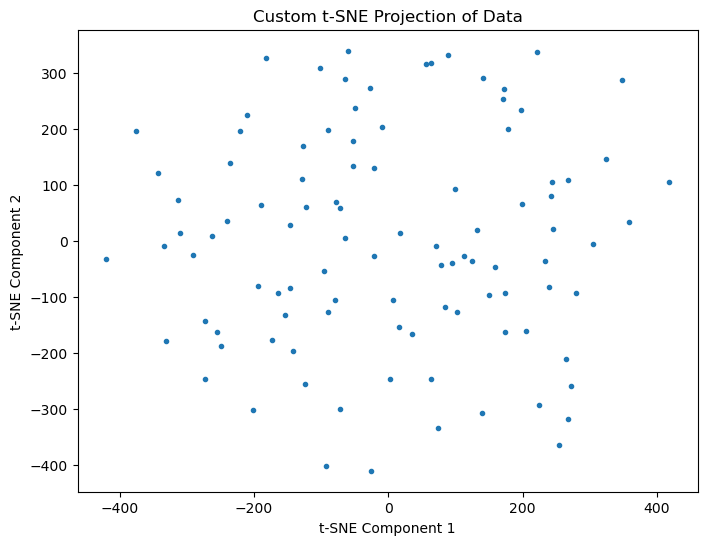

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(low_dim_embedding[:, 0], low_dim_embedding[:, 1], marker='.')
plt.title('Custom t-SNE Projection of Data')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()